In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [316]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!curl $data > AB_NYC_2019.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6912k  100 6912k    0     0  11.0M      0 --:--:-- --:--:-- --:--:-- 11.0M


In [317]:
df1 = pd.read_csv('AB_NYC_2019.csv')

In [318]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [319]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [320]:
df = df1[['neighbourhood_group',
           'room_type',
           'latitude',
           'longitude',
           'price',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']]

categorical_columns = ['neighbourhood_group','room_type']
numerical_columns   = ['latitude',
           'longitude',
           'price',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']

In [321]:
df

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,70,2,0,NaN,2,9
48891,Brooklyn,Private room,40.70184,-73.93317,40,4,0,NaN,2,36
48892,Manhattan,Entire home/apt,40.81475,-73.94867,115,10,0,NaN,1,27
48893,Manhattan,Shared room,40.75751,-73.99112,55,1,0,NaN,6,2


In [322]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [323]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [324]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [325]:
## What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [326]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [327]:
categorical_columns

['neighbourhood_group', 'room_type']

In [328]:
df.head().T

,0,1,2,3,4
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,0.0,4.64,0.1
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0


In [329]:
%matplotlib inline

<AxesSubplot:xlabel='neighbourhood_group', ylabel='Count'>

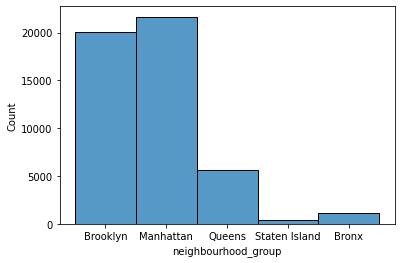

In [330]:
sns.histplot(df.neighbourhood_group)

In [331]:
#Split the data

#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
#Make sure that the target value ('price') is not in your dataframe.

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [334]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [374]:
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [336]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [337]:
df_full_train = df_full_train.reset_index(drop=True)

In [338]:
df_full_train.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [339]:
#Question 2

#Create the correlation matrix for the numerical features of your train dataset.
#In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

In [340]:
df_full_train[numerical_columns].corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080704,0.035015,0.025497,-0.011836,-0.013809,0.020299,-0.008341
longitude,0.080704,1.000000,-0.149080,-0.063498,0.057570,0.134401,-0.115289,0.082994
price,0.035015,-0.149080,1.000000,0.042740,-0.048926,-0.051978,0.055336,0.080562
minimum_nights,0.025497,-0.063498,0.042740,1.000000,-0.077860,-0.121687,0.121748,0.140596
number_of_reviews,-0.011836,0.057570,-0.048926,-0.077860,1.000000,0.584935,-0.072603,0.175428
reviews_per_month,-0.013809,0.134401,-0.051978,-0.121687,0.584935,1.000000,-0.047368,0.165565
calculated_host_listings_count,0.020299,-0.115289,0.055336,0.121748,-0.072603,-0.047368,1.000000,0.223328
availability_365,-0.008341,0.082994,0.080562,0.140596,0.175428,0.165565,0.223328,1.000000


In [341]:
##What are the two features that have the biggest correlation in this dataset?

In [342]:
#number_of_reviews and reviews_per_month

In [343]:
##Make price binary

#We need to turn the price variable from numeric into binary.
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152.


In [344]:
df_full_train.price >= 152

0         True
1        False
2        False
3        False
4        False
         ...  
39111    False
39112    False
39113    False
39114    False
39115    False
Name: price, Length: 39116, dtype: bool

In [345]:
above_average = (df_full_train.price >= 152).values.astype(int)
above_average

array([1, 0, 0, ..., 0, 0, 0])

In [346]:
y2_train = (y_train >= 152).astype(int)
y2_val   = (y_val >= 152).astype(int)

In [347]:
###Question 3

# Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
# Which of these two variables has bigger score? = rooom_type
# Round it to 2 decimal digits using round(score, 2)

In [348]:
def mutual_info_cat_score(series):
    return mutual_info_score(series, above_average)

In [349]:
mi = df_full_train[categorical_columns].apply(mutual_info_cat_score)

In [350]:
mi.round(2)

neighbourhood_group    0.05
room_type              0.14
dtype: float64

In [351]:
#Question 4

#Now let's train a logistic regression
#Remember that we have two categorical variables in the data. Include them using one-hot encoding.
#Fit the model on the training dataset.
#To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
#Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.
0.96


0.96

In [377]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [378]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

In [379]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly


In [357]:
model.fit(X_train, y_train)

/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [358]:
mi2 = model.intercept_[0]
mi2.round(2)

0.96

In [359]:
#Question 5

#We have 9 features: 7 numerical features and 2 categorical.
#Let's find the least useful one using the feature elimination technique.

#Train a model with all these features (using the same parameters as in Q4).
#Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
#For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
#Which of following feature has the smallest difference?
#neighbourhood_group
#room_type
#number_of_reviews
#reviews_per_month
#note: the difference doesn't have to be positive


In [360]:
all = ['neighbourhood_group',
           'room_type',
           'latitude',
           'longitude',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']



In [361]:
df_train[all].iloc[:10].to_dict(orient='records')

[{'neighbourhood_group': 'Brooklyn',
  'room_type': 'Entire home/apt',
  'latitude': 40.7276,
  'longitude': -73.94495,
  'minimum_nights': 3,
  'number_of_reviews': 29,
  'reviews_per_month': 0.7,
  'calculated_host_listings_count': 13,
  'availability_365': 50},
 {'neighbourhood_group': 'Manhattan',
  'room_type': 'Private room',
  'latitude': 40.70847,
  'longitude': -74.00498,
  'minimum_nights': 1,
  'number_of_reviews': 0,
  'reviews_per_month': 0.0,
  'calculated_host_listings_count': 1,
  'availability_365': 7},
 {'neighbourhood_group': 'Bronx',
  'room_type': 'Entire home/apt',
  'latitude': 40.83149,
  'longitude': -73.92766,
  'minimum_nights': 40,
  'number_of_reviews': 0,
  'reviews_per_month': 0.0,
  'calculated_host_listings_count': 1,
  'availability_365': 0},
 {'neighbourhood_group': 'Brooklyn',
  'room_type': 'Entire home/apt',
  'latitude': 40.66448,
  'longitude': -73.99407,
  'minimum_nights': 2,
  'number_of_reviews': 3,
  'reviews_per_month': 0.08,
  'calculated_

In [384]:
dv = DictVectorizer(sparse=False)

dicts_train_all = df_train[all].to_dict(orient='records')

dicts_val_all = df_val[all].to_dict(orient='records')


In [381]:
dv_all = DictVectorizer(sparse=False)
dv_all.fit(dicts_train_all)

DictVectorizer(sparse=False)

In [364]:
dv_all.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [386]:
X_train_all = dv_all.transform(dicts_train_all)
X_train_all

array([[ 50.     ,  13.     ,  40.7276 , ...,   1.     ,   0.     ,
          0.     ],
       [  7.     ,   1.     ,  40.70847, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.83149, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [ 88.     ,   1.     ,  40.79994, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69585, ...,   0.     ,   1.     ,
          0.     ],
       [281.     ,   2.     ,  40.64438, ...,   1.     ,   0.     ,
          0.     ]])

In [367]:
model_all = LogisticRegression(solver='lbfgs')
model_all.fit(X_train_all, y_train)

/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [368]:
w0 = model_all.intercept_[0]
w0

0.00014222337064245336

In [369]:
w = model_all.coef_[0]
w.round(3)

array([-0.002, -0.007,  0.006, -0.01 ,  0.005,  0.   ,  0.001, -0.001,
       -0.   , -0.   ,  0.018,  0.001, -0.001,  0.   ,  0.   ])

In [370]:
dict(zip(dv_all.get_feature_names(), w.round(3)))

{'availability_365': -0.002,
 'calculated_host_listings_count': -0.007,
 'latitude': 0.006,
 'longitude': -0.01,
 'minimum_nights': 0.005,
 'neighbourhood_group=Bronx': 0.0,
 'neighbourhood_group=Brooklyn': 0.001,
 'neighbourhood_group=Manhattan': -0.001,
 'neighbourhood_group=Queens': -0.0,
 'neighbourhood_group=Staten Island': -0.0,
 'number_of_reviews': 0.018,
 'reviews_per_month': 0.001,
 'room_type=Entire home/apt': -0.001,
 'room_type=Private room': 0.0,
 'room_type=Shared room': 0.0}

In [371]:
xs = ['neighbourhood_group',
           'room_type',
           'latitude',
           'longitude',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']

def modelling_vars(x):

    df_train[x].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dicts_train_all = df_train[x].to_dict(orient='records')
    dicts_val_all   = df_val[x].to_dict(orient='records')

    dv_all = DictVectorizer(sparse=False)
    dv_all.fit(dicts_train_all)

    dv_all.get_feature_names()

    X_train_all = dv_all.transform(dicts_train_all)
    X_val_all = dv_all.transform(dicts_val_all)

    model_all = LogisticRegression(solver='lbfgs')
    model_all.fit(X_train_all, y2_train)
    
    y_pred = model_all.predict_proba(X_val_all)[:,1]
    return ((y_pred > 0.5).astype(int) == y2_val).mean()

base = modelling_vars(xs)

a = []
for y in xs:
    xp = xs.copy()
    xp.pop(xp.index(y))  
    r = (y,base - modelling_vars(xp))
    a.append(r)
    
a

/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[('neighbourhood_group', 0.03527968094897227),
 ('room_type', 0.06994580222926672),
 ('latitude', -0.00010225994477963685),
 ('longitude', -0.0005112997238981842),
 ('minimum_nights', 0.0008180795582369838),
 ('number_of_reviews', -0.0007158196134574579),
 ('reviews_per_month', 0.0011248593925758943),
 ('calculated_host_listings_count', -0.0004090397791185474),
 ('availability_365', 0.004703957459862962)]

In [ ]:
###Question 6

#For this question, we'll see how to use a linear regression model from Scikit-Learn
#We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
#Fit the Ridge regression model on the training data.
#This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
#Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
#If there are multiple options, select the smallest alpha.

In [372]:
log10price = np.log1p(df.price)
log10price

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

In [389]:
def rmse(y_full_train, log_pred_y):
    se = (y_full_train - log_pred_y) ** 2
    mse = se.mean()
    return np.sqrt(mse)

X_train_all = dv_all.transform(dicts_train_all)
X_val_all   = dv_all.transform(dicts_val_all)
y_full_train = np.log1p(y_train)
y3_val        = np.log1p(y_val)

res = []
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha)
    model.fit(X_train_all, y_full_train)
    predict_y_val = model.predict(X_val_all)
    score = rmse(predict_y_val,y3_val)
    res.append((alpha,score))

res

[(0, 0.49726121225088366),
 (0.01, 0.49711730461906345),
 (0.1, 0.4971183244694398),
 (1, 0.4971395363320048),
 (10, 0.4978866015876553)]